In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
# 定义文件名
ACTION_201602_FILE = "data/JData_Action_201602.csv"
ACTION_201603_FILE = "data/JData_Action_201603.csv"
# ACTION_201603_EXTRA_FILE = "data/JData_Action_201603_extra.csv"
ACTION_201604_FILE = "data/JData_Action_201604.csv"
COMMENT_FILE = "data/JData_Comment.csv"
PRODUCT_FILE = "data/JData_Product.csv"
USER_FILE = "data/JData_User.csv"
NEW_USER_FILE = "data/JData_User_New.csv"
USER_TABLE_FILE = "data/user_table.csv"
ITEM_TABLE_FILE = "data/item_table.csv"

In [3]:
# 提取购买(type=4)的行为数据
def get_from_action_data(fname, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    df_ac = {}
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
            if len(chunks) % 15 == 0:
                df_ac = pd.concat(chunks, ignore_index=True)
                df_ac = df_ac[df_ac['type'] == 4]
                chunks = [df_ac]
                print(len(df_ac.index))
        except StopIteration:
            loop = False
            print("Iteration is stopped")

#     df_ac = pd.concat(chunks, ignore_index=True)
    # type=4,为购买
#     df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["user_id", "sku_id", "time"]]

In [4]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
# df_ac.append(get_from_action_data(fname=ACTION_201603_EXTRA_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)

1816
2667
3995
5611
7032
8495
10051
11366
Iteration is stopped
1814
3102
4082
5736
6972
8220
9371
10344
11935
14030
15635
16786
17773
18951
20200
21399
22594
23849
Iteration is stopped
1243
2178
3196
4614
6151
7181
8292
9940
11851
Iteration is stopped


In [5]:
print(df_ac.dtypes)

user_id    float64
sku_id       int64
time        object
dtype: object


In [6]:
#将time字段转换为datetime
df_ac['time'] = pd.to_datetime(df_ac['time'])

In [7]:
# 使用lambda匿名函数将时间time转换为星期(周一为1, 周日为７)
df_ac['time'] = df_ac['time'].apply(lambda x : x.weekday() + 1)

In [8]:
#周一到周日每天购买用户个数
df_user = df_ac.groupby('time')['user_id'].nunique()

In [9]:
df_user = df_user.to_frame().reset_index()

In [10]:
df_user.columns = ['weekday','user_num']

In [11]:
df_user

,weekday,user_num
0,1,6070
1,2,6946
2,3,5001
3,4,5920
4,5,5708
5,6,4174
6,7,3710


In [12]:
#周一到周日每天购买商品种类数
df_item = df_ac.groupby('time')['sku_id'].nunique()

In [13]:
df_item = df_item.to_frame().reset_index()

In [14]:
df_item.columns = ['weekday','item_num']

In [15]:
df_item

,weekday,item_num
0,1,1833
1,2,1996
2,3,1800
3,4,1726
4,5,1805
5,6,1643
6,7,1578


In [16]:
#周一到周日每天购买商品数
df_ui = df_ac.groupby('time',as_index=False).size()

In [17]:
df_ui = df_ui.to_frame().reset_index()

In [18]:
df_ui.columns = ['weekday','user_item_num']

In [19]:
df_ui

,weekday,user_item_num
0,1,7640
1,2,8869
2,3,6262
3,4,7439
4,5,7077
5,6,5143
6,7,4636


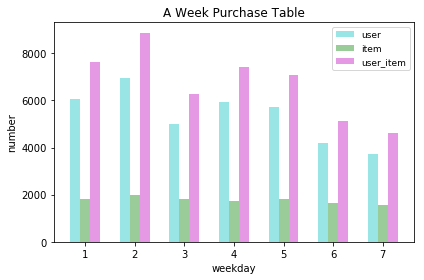

In [20]:
bar_width = 0.2
opacity = 0.4

plt.bar(df_user['weekday'],df_user['user_num'],bar_width,alpha=opacity,color='c',label='user')
plt.bar(df_item['weekday'] + bar_width,df_item['item_num'],bar_width,alpha=opacity,color='g',label='item')
plt.bar(df_ui['weekday']+2*bar_width,df_ui['user_item_num'],bar_width,alpha=opacity,color='m',label='user_item')

plt.xlabel('weekday')
plt.ylabel('number')
plt.title('A Week Purchase Table')

plt.xticks(df_user['weekday'] + bar_width, (1,2,3,4,5,6,7))
plt.tight_layout()
plt.legend(prop={'size':9})

一个月每天购买情况

In [21]:
df_ac = get_from_action_data(fname=ACTION_201602_FILE)

df_ac['time'] = pd.to_datetime(df_ac['time']).apply(lambda x : x.day)

1816
2667
3995
5611
7032
8495
10051
11366
Iteration is stopped


In [22]:
df_user = df_ac.groupby(df_ac['time'])['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['day','user_num']
df_user.head(5)

,day,user_num
0,1,454
1,2,383
2,3,302
3,4,256
4,5,160


In [23]:
df_item = df_ac.groupby(df_ac['time'])['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['day','item_num']
df_item.head(5)

,day,item_num
0,1,352
1,2,311
2,3,255
3,4,213
4,5,147


In [24]:
df_ui = df_ac.groupby(df_ac['time'],as_index=False)['sku_id'].size()
df_ui = df_ui.to_frame().reset_index()
df_ui.columns = ['day','user_item_num']
df_ui.head(5)

,day,user_item_num
0,1,539
1,2,462
2,3,357
3,4,297
4,5,179


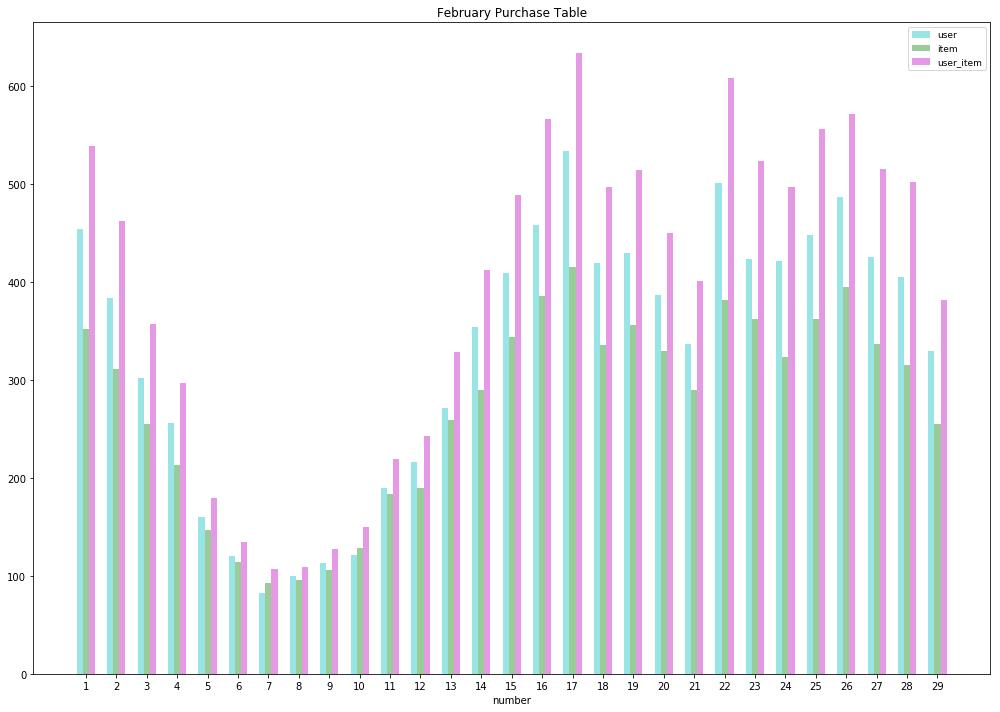

In [25]:
bar_width = 0.2
opacity = 0.4

day_range = range(1,len(df_user.index) + 1,1)
#设置图片大小
plt.figure(figsize=(14,10))

plt.bar(df_user['day'],df_user['user_num'],bar_width,alpha=opacity,color='c',label='user')
plt.bar(df_item['day'] + bar_width,df_item['item_num'],bar_width,alpha=opacity,color='g',label='item')
plt.bar(df_ui['day'] + 2*bar_width,df_ui['user_item_num'],bar_width,alpha=opacity,color='m',label='user_item')

plt.xlabel('day')
plt.xlabel('number')
plt.title('February Purchase Table')

plt.xticks(df_user['day'] + bar_width,day_range)
plt.tight_layout()
plt.legend(prop={'size':9})

```新年后的几天，兔子们忙着串门，没空买东西

In [38]:
#特定用户对特定商品的活动轨迹

In [38]:
def spec_ui_action_data(fname, user_id, item_id, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    df_ac = {}
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
            if len(chunks) % 10 == 0:
                df_ac = pd.concat(chunks, ignore_index=True) 
                df_ac = df_ac[(df_ac['user_id'] == user_id) & (df_ac['sku_id'] == item_id)]
                chunks = [df_ac]
        except StopIteration:
            loop = False
            print("Iteration is stopped")

#     df_ac = pd.concat(chunks, ignore_index=True)
#     df_ac = df_ac[(df_ac['user_id'] == user_id) & (df_ac['sku_id'] == item_id)]

    return df_ac

In [39]:
def explore_user_item_via_time():
    user_id = 200005
    item_id = 72967
    df_ac = []
    df_ac.append(spec_ui_action_data(ACTION_201602_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201603_FILE, user_id, item_id))
    df_ac.append(spec_ui_action_data(ACTION_201604_FILE, user_id, item_id))

    df_ac = pd.concat(df_ac, ignore_index=False)
#     df_ac = df_ac[df_ac['type'] == 4]
    print(df_ac.sort_values(by='time'))

In [40]:
explore_user_item_via_time()

Iteration is stopped
Iteration is stopped
Iteration is stopped
      user_id  sku_id  type                 time
0    200005.0   72967     6  2016-02-21 10:02:32
1    200005.0   72967     6  2016-02-21 10:02:32
2    200005.0   72967     1  2016-02-21 10:02:32
3    200005.0   72967     1  2016-02-21 10:02:32
4    200005.0   72967     6  2016-02-21 10:02:32
5    200005.0   72967     6  2016-02-21 10:03:03
13   200005.0   72967     6  2016-02-21 10:09:01
12   200005.0   72967     6  2016-02-21 10:09:01
11   200005.0   72967     6  2016-02-21 10:09:01
10   200005.0   72967     6  2016-02-21 10:09:01
8    200005.0   72967     1  2016-02-21 10:09:01
7    200005.0   72967     6  2016-02-21 10:09:01
6    200005.0   72967     6  2016-02-21 10:09:01
9    200005.0   72967     1  2016-02-21 10:09:01
19   200005.0   72967     6  2016-02-21 10:09:31
20   200005.0   72967     6  2016-02-21 10:09:31
18   200005.0   72967     6  2016-02-21 10:09:31
14   200005.0   72967     6  2016-02-21 10:09:31
16   2